In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
# loading data from load_boston.
df = load_boston()
dataset = pd.DataFrame(df.data)

# giving names to the columns
dataset.columns = df.feature_names
# data set. x as input and y as expected output.
X = dataset
Y = df.target
# train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

/home/pluton/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [3]:
# standardising the training data set
from sklearn.preprocessing import StandardScaler
scalar  = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [4]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression()

In [5]:
# crossvalidation
mse = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv = 10)
np.mean(mse)

-25.550660791660782

In [6]:
# prediction
reg_predict = regression.predict(x_test)

/home/pluton/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


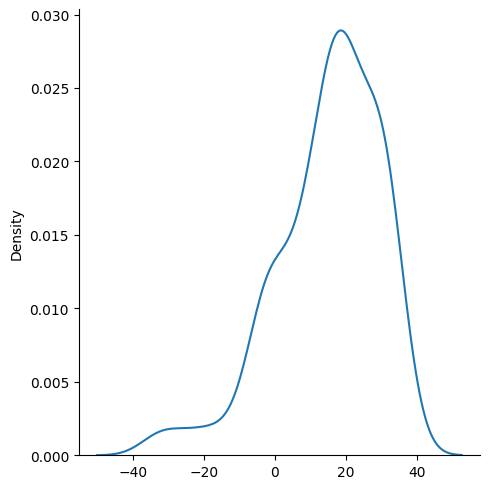

In [7]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [8]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict,y_test)
score

-0.32338194108949225